In [ ]:
import gensim
import pickle 
def word2vec(data, model):
    
    m = gensim.models.Word2Vec.load(model)
    
    #data processing. seperate into seperate words
    df = data
    text = df["text"]
    text = text.dropna()
    textList = text.values.tolist()

    sentenceList = []
    for word in textList:
        sentenceList.append(word.split(" "))

    print("creating embeddings...")
    embeddings = {}
    for sentence in sentenceList:
        for w in sentence:
            try:
                embeddings[w] = m.wv[w]
            except KeyError:
                continue

    name = input("Enter the name of the model (no spaces): ")
    print("Pickling...")

    pickle.dump(embeddings, open("word2vec_on_%s.pkl"%(name), "wb" ) )

    # to_pickle = open(f"word2vec_on_{data[:-4]}_{name}.pkl", "wb")
    # pickle.dump(embeddings, to_pickle)
    # to_pickle.close()

In [ ]:
import pandas as pd 
data = pd.read_csv('/content/vax-sideeffects-FINAL.csv', engine='python')
model = './word2vec.bin'
word2vec(data, model)

creating embeddings...
Enter the name of the model (no spaces): APNews
Pickling...


In [ ]:
import pandas as pd
apnew = {}
with open('./word2vec_on_APNews.pkl', 'rb') as handle:
    apnew = pickle.load(handle)  

data = pd.read_csv('/content/vax-sideeffects-FINAL.csv', engine='python')

In [ ]:
import numpy as np
new_cols = ['f%s'%xx for xx in range(300)]

new_data = pd.DataFrame(columns=new_cols)
k = 0

for i, r in data.iterrows():
    x = np.zeros(shape=(len(r.text),300), dtype = np.float64)

    # Each word not binary
    for i in range(len(r.text)):

        if r.text[i] in apnew:

            x[i, :] = apnew[r.text[i]]

    word_vec = np.mean(x, axis=0)

    new_data.loc[k] = list(word_vec)
    k += 1

new_data['V/L'] = data['V/L']
print(data,new_data)

                                                   text V/L  ...  verified  sentiment
0     peopl almost everi vaccin side effect believ b...   V  ...     False   Positive
1     evid support claim million dose given blood cl...   L  ...     False   Positive
2     got first shot today get glorious drunk blame ...   L  ...     False   Positive
3     total differ type vaccin might feel great afte...   L  ...     False   Positive
4     take selfi earlier even got first vaccin shot ...   L  ...     False   Positive
...                                                 ...  ..  ...       ...        ...
1596  congrat debi year old gramma got second dose m...   L  ...     False   Positive
1597            side effect vaccin dose except sore arm   L  ...     False   Negative
1598  holi fuck lie said second vaccin dose harsher ...   V  ...     False   Negative
1599  vaccin side effect heard rough hour afterward ...   V  ...     False   Positive
1600  get vaccin side effect nanobot next feel tingl..

In [ ]:
new_data2 = new_data.dropna(inplace=False)
new_data2



,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,V/L
0,0.149097,0.000164,-0.014046,-0.075994,0.007621,0.039825,-0.075970,-0.101819,0.042582,0.108882,-0.136191,-0.077013,-0.302696,-0.028363,0.137291,0.083810,-0.027809,0.144853,0.125108,-0.014614,-0.233282,0.154053,-0.084417,0.028803,-0.127125,0.027823,-0.120137,-0.153972,-0.042379,0.039270,-0.029797,0.042916,-0.193004,0.032135,0.225826,-0.031120,-0.058993,-0.048871,0.069408,-0.023551,...,0.021485,0.069062,-0.173896,-0.022581,0.206980,-0.103299,0.070767,0.026914,0.123904,-0.049501,0.022656,-0.087468,-0.003911,-0.109057,-0.115156,0.131069,-0.005186,0.168434,-0.069355,-0.038750,0.062728,-0.000151,0.059175,0.060293,0.104489,0.081326,0.011166,-0.025955,0.167857,0.255735,0.026541,0.021217,0.128694,-0.058675,0.004186,0.060144,0.062198,-0.163524,-0.034886,V
1,0.088229,0.002742,-0.033452,-0.052276,0.001681,0.060900,-0.044553,-0.094751,0.001830,0.069636,-0.066295,-0.055598,-0.218915,-0.011289,0.122029,0.073984,-0.037361,0.102240,0.084500,-0.021105,-0.153730,0.119414,-0.058230,0.010014,-0.097844,0.011338,-0.081461,-0.130454,-0.034138,0.015538,-0.021693,0.050795,-0.117249,0.028557,0.167769,-0.015163,-0.025223,-0.055603,0.069895,0.006139,...,0.019376,0.027834,-0.156830,-0.035197,0.148162,-0.067211,0.060335,0.017666,0.085116,-0.055237,0.008524,-0.061719,-0.017019,-0.094280,-0.066866,0.099456,0.022064,0.133797,-0.055161,-0.021092,0.017232,0.003109,0.065150,0.035292,0.076780,0.054136,-0.011036,-0.020978,0.143829,0.170374,0.031398,0.007825,0.121216,-0.034617,-0.024322,0.021885,0.009058,-0.111003,-0.038331,L
2,0.103966,0.014106,-0.051986,-0.032436,-0.036900,0.035817,-0.062699,-0.098706,0.006757,0.053897,-0.089221,-0.043839,-0.189657,-0.018131,0.147886,0.085117,-0.078168,0.129845,0.096905,-0.033370,-0.170111,0.103070,-0.059737,0.035139,-0.070554,-0.000894,-0.056176,-0.136489,-0.034340,0.022891,-0.020082,0.037838,-0.136474,0.025057,0.185196,-0.027672,-0.033069,-0.094327,0.051183,0.017599,...,0.028419,0.037836,-0.163499,-0.058050,0.188600,-0.064039,0.074853,0.017417,0.088180,-0.070233,0.002654,-0.048851,-0.010768,-0.105227,-0.069668,0.085591,0.006208,0.135716,-0.060453,-0.025526,-0.000260,0.011349,0.100726,0.033880,0.103141,0.063615,-0.028981,-0.026525,0.125483,0.166429,0.065260,-0.002431,0.149666,-0.016168,-0.046741,0.024720,0.029415,-0.105700,-0.039306,L
3,0.106834,0.005558,-0.043210,-0.041916,-0.030330,0.054849,-0.072064,-0.117545,-0.003304,0.083736,-0.117078,-0.065977,-0.246331,-0.018442,0.150350,0.097476,-0.067230,0.139302,0.110157,-0.022040,-0.208493,0.139642,-0.074790,0.000628,-0.108760,-0.000408,-0.084156,-0.163373,-0.011836,0.020217,-0.030585,0.038102,-0.148687,0.030727,0.231134,-0.033706,-0.024722,-0.074385,0.057998,0.018708,...,0.049892,0.038385,-0.184820,-0.029817,0.197139,-0.079695,0.081299,0.022469,0.105004,-0.089372,0.010982,-0.066086,-0.038204,-0.124085,-0.086973,0.121505,0.028490,0.158003,-0.066938,-0.039720,0.016743,0.022957,0.080272,0.038000,0.104650,0.060939,-0.040329,-0.041325,0.165440,0.212782,0.039896,-0.002065,0.156665,-0.043058,-0.048035,0.027649,0.056678,-0.131175,-0.036955,L
4,0.138306,0.017122,-0.054016,-0.050346,-0.000546,0.053870,-0.072369,-0.108863,0.040028,0.068205,-0.134668,-0.059259,-0.257282,-0.016501,0.132589,0.107871,-0.057269,0.177090,0.126803,0.000918,-0.212619,0.134786,-0.080731,0.018972,-0.103483,-0.001206,-0.094913,-0.155187,-0.058615,0.046441,-0.023874,0.051777,-0.169690,0.039185,0.213267,-0.012547,-0.034908,-0.078636,0.061578,-0.002699,...,0.015337,0.050569,-0.141508,-0.042985,0.218136,-0.086063,0.062984,0.038523,0.100727,-0.054138,0.003718,-0.066527,-0.011818,-0.095320,-0.094687,0.106693,-0.005876,0.158923,-0.052992,-0.042905,0.042143,0.015658,0.061902,0.0319

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


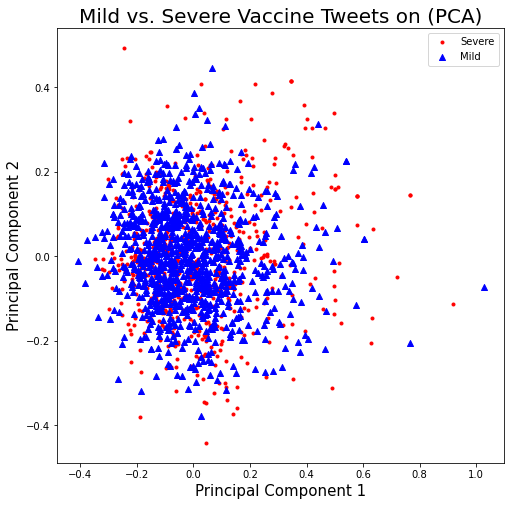

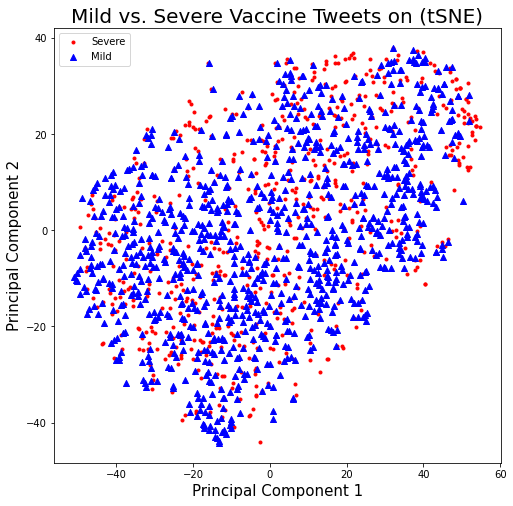

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def get_PCA(data):
    pca = PCA(n_components=2)
    pca.fit(data)

    return pca.transform(data)

def split_data(data,label):
    v_X = []
    l_X = []
    for i in range(len(data)):
        if label[i] == "V":
            v_X += [data[i]]
        if label[i] == "L":
            l_X += [data[i]]
    v_X = np.array(v_X)
    l_X = np.array(l_X)

    return v_X,l_X

'''
Code to plot the dimension reductiont hat is being done
'''
def plot_reduction(v_X, l_X, method, title = "Sample Scaling"):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Mild vs. Severe Vaccine Tweets on (%s)' % (method), fontsize=20)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.scatter(v_X[:, 0], v_X[:, 1], c="red", marker=".", label='Severe')
    ax.scatter(l_X[:, 0], l_X[:, 1], c="blue", marker="^", label='Mild')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend()
    plt.savefig("./dim_reduction-apnews_%s.pdf"%(method))

data_noVL = new_data2.drop(columns=['V/L'])

low_dim = get_PCA(data_noVL)
v_X,l_X = split_data(low_dim,np.array(new_data2["V/L"]))
plot_reduction(v_X,l_X,"PCA")

X2 = TSNE(n_components=2).fit_transform(data_noVL) #TSNE would throw an error if it got n_jobs as a param
v_X, l_X = split_data(X2, np.array(new_data2["V/L"]))
plot_reduction(v_X,l_X,"tSNE")

In [ ]:
# print(new_data,data)
cols = ['f%s'%i for i in range(300)]+ list(data.columns[1:])
f_data = pd.DataFrame(columns=cols)
# print(f_data)

for i,r in data.iterrows():
  n_row = list(new_data.loc[i,['f%s'%j for j in range(300)]]) + list(r[data.columns[1:]])
  f_data.loc[i] = n_row

print(f_data)
f_data.to_csv('word_embedings-APNews.csv',index=False)

            f0        f1        f2  ...  favourites_count  verified  sentiment
0     0.149097  0.000164 -0.014046  ...            217303     False   Positive
1     0.088229  0.002742 -0.033452  ...             20571     False   Positive
2     0.103966  0.014106 -0.051986  ...               545     False   Positive
3     0.106834  0.005558 -0.043210  ...             32063     False   Positive
4     0.138306  0.017122 -0.054016  ...              2452     False   Positive
...        ...       ...       ...  ...               ...       ...        ...
1596  0.081326  0.026097 -0.040841  ...             39741     False   Positive
1597  0.105269  0.025247 -0.065276  ...             19737     False   Negative
1598  0.145329 -0.022682 -0.023650  ...               934     False   Negative
1599  0.175375  0.017594 -0.056769  ...             18400     False   Positive
1600  0.080660  0.019225 -0.020078  ...            503083     False    Neutral

[1601 rows x 310 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
textInfo = list(data.text)

X = vectorizer.fit(textInfo)
max(X.idf_)
tfidi_dict = dict(
    [(w, X.idf_[i]) for w, i in X.vocabulary_.items()])

new_dict = apnew

new_cols = ['f%s' % xx for xx in range(300)]

data_tfidf = pd.DataFrame(columns=new_cols)
k = 0

for i, r in data.iterrows():

    sent = set(r.text.split())
    x = np.zeros(shape=(len(sent), 300), dtype=np.float64)

    
    for j in range(len(list(sent))):
        # Binary of rules
        if list(sent)[j] in new_dict and list(sent)[j] in tfidi_dict:
            x[j, :] = new_dict[list(sent)[j]] * tfidi_dict[list(sent)[j]]


    word_vec_tfidf = np.mean(x, axis=0)

    data_tfidf.loc[k] = list(word_vec_tfidf)
    k += 1

data_tfidf['V/L'] = data['V/L']
print(data_tfidf)

            f0        f1        f2        f3  ...      f297      f298      f299  V/L
0     0.314352  0.155116  0.109788 -0.132857  ...  0.052469 -0.338176 -0.358115    V
1     0.637220 -0.153558  0.447887 -0.346943  ...  0.119453 -0.028577 -0.537953    L
2     0.566158  0.132470  0.018351 -0.086150  ...  0.144455 -0.244982 -0.056512    L
3     0.334242  0.466071 -0.069342 -0.083634  ...  0.085948 -0.087501 -0.168555    L
4     0.116373  0.396152  0.120364 -0.016568  ...  0.228632 -0.104763 -0.104777    L
...        ...       ...       ...       ...  ...       ...       ...       ...  ...
1596  0.388724  0.401743 -0.170772 -0.162712  ...  0.179333 -0.162812  0.128621    L
1597  0.098129 -0.068598 -0.109982 -0.102542  ...  0.354496 -0.047040 -0.452606    L
1598  0.205685 -0.207742  0.465945 -0.181401  ...  0.816631 -0.345802 -0.564880    V
1599  0.453132  0.300613  0.074431 -0.042072  ... -0.034505 -0.289166 -0.389985    V
1600  0.356295  0.093326 -0.192386  0.079457  ...  0.486783 -0.48

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


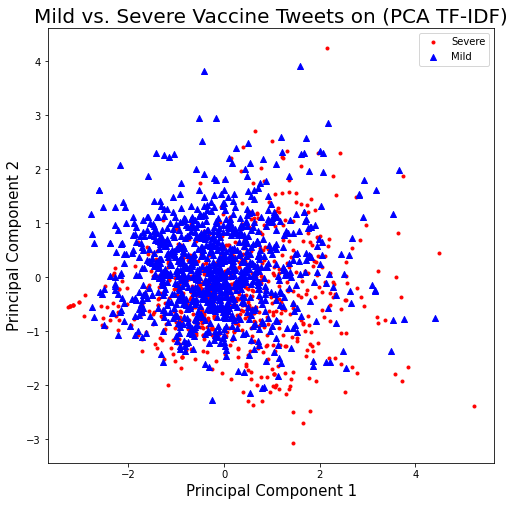

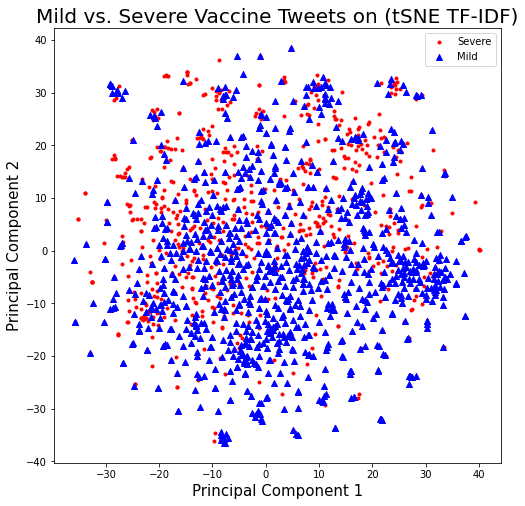

In [ ]:
data_tfidf2 = data_tfidf.dropna(inplace=False)
data_noVL = data_tfidf2.drop(columns=['V/L'])

low_dim = get_PCA(data_noVL)
v_X,l_X = split_data(low_dim,np.array(data_tfidf2["V/L"]))
plot_reduction(v_X,l_X,"PCA TF-IDF")

X2 = TSNE(n_components=2).fit_transform(data_noVL) #TSNE would throw an error if it got n_jobs as a param
v_X, l_X = split_data(X2, np.array(data_tfidf2["V/L"]))
plot_reduction(v_X,l_X,"tSNE TF-IDF")

In [ ]:
# print(new_data,data)
cols = ['f%s'%i for i in range(300)]+ list(data.columns[1:])
f_data = pd.DataFrame(columns=cols)
# print(f_data)

for i,r in data.iterrows():
  n_row = list(data_tfidf.loc[i,['f%s'%j for j in range(300)]]) + list(r[data.columns[1:]])
  f_data.loc[i] = n_row

print(f_data)
f_data.to_csv('word_embedings-APNews-tfidf.csv',index=False)


            f0        f1        f2  ...  favourites_count  verified  sentiment
0     0.314352  0.155116  0.109788  ...            217303     False   Positive
1     0.637220 -0.153558  0.447887  ...             20571     False   Positive
2     0.566158  0.132470  0.018351  ...               545     False   Positive
3     0.334242  0.466071 -0.069342  ...             32063     False   Positive
4     0.116373  0.396152  0.120364  ...              2452     False   Positive
...        ...       ...       ...  ...               ...       ...        ...
1596  0.388724  0.401743 -0.170772  ...             39741     False   Positive
1597  0.098129 -0.068598 -0.109982  ...             19737     False   Negative
1598  0.205685 -0.207742  0.465945  ...               934     False   Negative
1599  0.453132  0.300613  0.074431  ...             18400     False   Positive
1600  0.356295  0.093326 -0.192386  ...            503083     False    Neutral

[1601 rows x 310 columns]


In [ ]:
# rules
sev_rules = '/content/severe_over2.csv'
mild_rules = '/content/mild_over2.csv'
sv = pd.read_csv(sev_rules)
md = pd.read_csv(mild_rules)
rules_v = sv.word.tolist()
rules_l = md.word.tolist()

# rules = pd.read_csv('/content/key_words_over_2.csv')
# rules_v = rules.loc[0].text.strip('\n').split(' ')
# rules_l = rules.loc[1].text.strip('\n').split(' ')

import numpy as np
new_cols = ['f%s'%xx for xx in range(300)]

new_data = pd.DataFrame(columns=new_cols)
k = 0

for i, r in data.iterrows():
    x = np.zeros(shape=(len(r.text),300), dtype = np.float64)
    class_info = r['V/L']

    search_text = r.text.split(' ')
    # Each word not binary
    for i in range(len(search_text)):

        if class_info == 'V':
          if search_text[i] in apnew and search_text[i] in rules_v:

              x[i, :] = apnew[search_text[i]]
        if class_info == 'L':
          if search_text[i] in apnew and search_text[i] in rules_l:

              x[i, :] = apnew[search_text[i]]

    word_vec = np.mean(x, axis=0)

    new_data.loc[k] = list(word_vec)
    k += 1

new_data['V/L'] = data['V/L']

print(data,new_data)

                                                   text V/L  ...  verified  sentiment
0     peopl almost everi vaccin side effect believ b...   V  ...     False   Positive
1     evid support claim million dose given blood cl...   L  ...     False   Positive
2     got first shot today get glorious drunk blame ...   L  ...     False   Positive
3     total differ type vaccin might feel great afte...   L  ...     False   Positive
4     take selfi earlier even got first vaccin shot ...   L  ...     False   Positive
...                                                 ...  ..  ...       ...        ...
1596  congrat debi year old gramma got second dose m...   L  ...     False   Positive
1597            side effect vaccin dose except sore arm   L  ...     False   Negative
1598  holi fuck lie said second vaccin dose harsher ...   V  ...     False   Negative
1599  vaccin side effect heard rough hour afterward ...   V  ...     False   Positive
1600  get vaccin side effect nanobot next feel tingl..

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


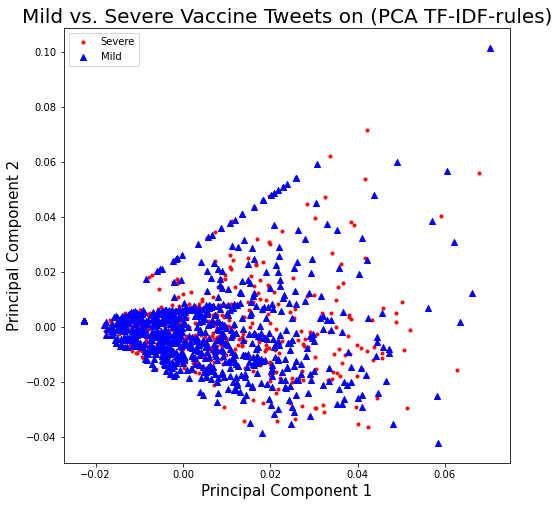

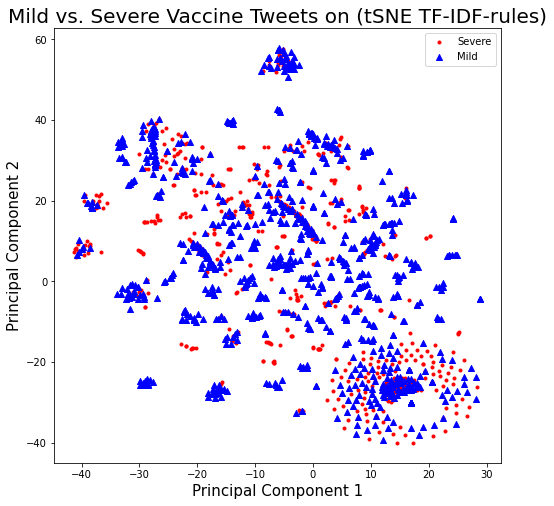

In [ ]:
new_data_rule2 = new_data.dropna(inplace=False)
data_noVL = new_data_rule2.drop(columns=['V/L'])

low_dim = get_PCA(data_noVL)
v_X,l_X = split_data(low_dim,np.array(new_data_rule2["V/L"]))
plot_reduction(v_X,l_X,"PCA TF-IDF-rules")

X2 = TSNE(n_components=2).fit_transform(data_noVL) #TSNE would throw an error if it got n_jobs as a param
v_X, l_X = split_data(X2, np.array(new_data_rule2["V/L"]))
plot_reduction(v_X,l_X,"tSNE TF-IDF-rules")

In [ ]:
# print(new_data,data)
cols = ['f%s'%i for i in range(300)]+ list(data.columns[1:])
f_data = pd.DataFrame(columns=cols)
# print(f_data)

for i,r in data.iterrows():
  n_row = list(new_data.loc[i,['f%s'%j for j in range(300)]]) + list(r[data.columns[1:]])
  f_data.loc[i] = n_row

print(f_data)
f_data.to_csv('word_embedings-APNews-tfidf-rules.csv',index=False)


            f0        f1        f2  ...  favourites_count  verified  sentiment
0     0.002553  0.001772  0.000486  ...            217303     False   Positive
1     0.002042 -0.000063  0.001416  ...             20571     False   Positive
2    -0.001815  0.005538 -0.001289  ...               545     False   Positive
3     0.002647  0.006283  0.001854  ...             32063     False   Positive
4     0.000783 -0.000379  0.002345  ...              2452     False   Positive
...        ...       ...       ...  ...               ...       ...        ...
1596  0.004250  0.001517  0.002129  ...             39741     False   Positive
1597  0.000000  0.000000  0.000000  ...             19737     False   Negative
1598  0.000000  0.000000  0.000000  ...               934     False   Negative
1599  0.001541  0.002026  0.000841  ...             18400     False   Positive
1600  0.000609  0.000479  0.002305  ...            503083     False    Neutral

[1601 rows x 310 columns]
